In [30]:
def edit_distance(text_1, text_2):
  if len(text_1) == 0:
    return len(text_2)

  elif len(text_2) == 0:
    return len(text_1)

  elif text_1[0] == text_2[0]:
    return edit_distance(text_1[1 : ], text_2[1 : ])

  delete = edit_distance(text_1[1 : ], text_2)
  insert = edit_distance(text_1, text_2[1 : ])
  substitution = edit_distance(text_1[1 : ], text_2[1 : ])

  cost = min(delete, insert , substitution) + 1
  return cost


In [ ]:
def edit_distance_dp(seq1, seq2):

    # create an empty 2D matrix to store cost
    cost = np.zeros((len(seq1)+1, len(seq2)+1))

    # fill the first row
    cost[0] = [i for i in range(len(seq2)+1)]

    # fill the first column
    cost[:, 0] = [i for i in range(len(seq1)+1)]

    # to store the operations made
    operations = np.asarray([['-' for j in range(len(seq2)+1)] \
                                 for i in range(len(seq1)+1)])

    # fill the first row by insertion
    operations[0] = ['I' for i in range(len(seq2)+1)]

    # fill the first column by insertion operation (D)
    operations[:, 0] = ['D' for i in range(len(seq1)+1)]

    operations[0, 0] = '-'

    # now, iterate over earch row and column
    for row in range(1, len(seq1)+1):

        for col in range(1, len(seq2)+1):

            # if both the characters are same then the cost will be same as
            # the cost of the previous sub-sequence
            if seq1[row-1] == seq2[col-1]:
                cost[row][col] = cost[row-1][col-1]
            else:

                insertion_cost = cost[row][col-1] + 1
                deletion_cost = cost[row-1][col] + 1
                substitution_cost = cost[row-1][col-1] + 1

                # calculate the minimum cost
                cost[row][col] = min(insertion_cost, deletion_cost, substitution_cost)

                # get the operation
                if cost[row][col] == substitution_cost:
                    operations[row][col] = 'S'

                elif cost[row][col] == ins_cost:
                    operations[row][col] = 'I'
                else:
                    operations[row][col] = 'D'

    return cost[len(seq1), len(seq2)], min_cost_path(cost, operations)

In [31]:
seq1 = "kitten"
seq2 = "sitting"
edit_distance(seq1, seq2)

3

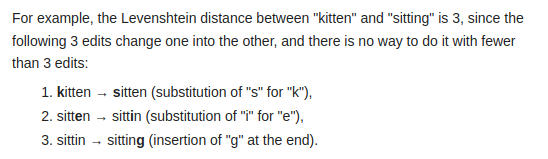